In [148]:
from binance.client import Client
import numpy as np
import matplotlib.pyplot as plt

In [149]:
def moving_avg(price, last_N):
    moving_n_list = []
    for i in range(len(price)):
        if i < last_N - 1:
            moving_n_list.append(0)
        else:
            avg = np.sum(price[i-last_N+1: i+1])/last_N
            moving_n_list.append(avg)
    
    return moving_n_list

In [224]:
binance_apikey = "NO6lO6XQ59PVIp8Ijhn2eaWEL9IBybGAs8ak5LkgXcD5s0Blw5rKuFamxdy79iBk"
secret_key = "iTxINdppkNlYWyhuiVxml2BdOLovEE0Ds3ZyOIX7l2hMrKW7aQKBhbaiV3KJQaII"
client = Client(binance_apikey, secret_key)
depth = client.get_order_book(symbol='BNBBTC')
candles = client.get_klines(symbol='BNBBTC', interval='1d')

In [225]:
close_price = [float(item[4]) for item in candles]
moving_5 = []
moving_25 = []
moving_5 = moving_avg(close_price, 5)
moving_25 = moving_avg(close_price, 25)            
            
    

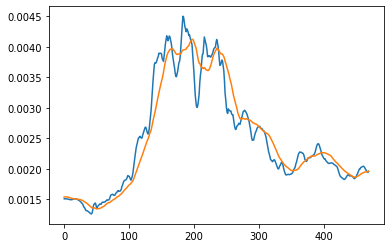

<Figure size 360x1440 with 0 Axes>

In [226]:
plt.plot(moving_5[30:])
plt.plot(moving_25[30:])
plt.figure(figsize=[5,20])
plt.show()

In [227]:
def MovingAverageStrategy(avg_5, avg_25, last_status, coin_price):
    diff = abs(avg_5 - avg_25) - coin_price * 0.00075
    if last_status == "idle":
        if avg_5 > avg_25:
            current = "up"
            strategy = "Hold"
        elif avg_5 < avg_25:
            current = "down"
            strategy = "Hold"
        else:
            current = "idle"
            strategy = "Hold"
    elif last_status == "up":
        if avg_5 < avg_25:
            current = "down"
            if diff > 0:
                strategy = "Sell"
            else:
                strategy = "Hold"
        else:
            current = "up"
            strategy = "Hold"
    elif last_status == "down":
        if avg_5 > avg_25:
            current = "up"
            if diff > 0:
                strategy = "Buy"
            else:
                strategy = "Hold"
        else:
            current = "down"
            strategy = "Hold"
    
    return current, strategy

def take_action(my_money, my_coin, coin_price, strategy, avg5, avg25):
    if strategy == "Buy":
        if my_money > 0:
            coin_number = my_money/coin_price
            my_coin = [coin_number, coin_price]
#             my_money -= coin_number*coin_price
            my_money -= coin_number*coin_price*(1+0.00075)
            print("Buy")
            print("coin number:" + str(my_coin[0]) + " Buy Price:" + str(coin_price))
#             print()

    elif strategy == "Sell":
        if my_coin[0] > 0:
            my_money += coin_price*my_coin[0] * (1-0.00075)
            my_coin = [0, 0]
            print("Sell")
            print("money:" + str(my_money) + " Sell Price:" + str(coin_price))
#             print("coin number:" + str(my_coin[0]))
            
    return my_money, my_coin
            
            

In [228]:
last_status = "idle"
my_money = 100
my_coin = [0,0]
for i in range(30, len(close_price)):
    last_status, strategy = MovingAverageStrategy(moving_5[i], moving_25[i], last_status, close_price[i])
    my_money, my_coin = take_action(my_money, my_coin, close_price[i], strategy, moving_5[i], moving_25[i])
    
   

Buy
coin number:66436.35397289396 Buy Price:0.0015052
Sell
money:98.85420209938879 Sell Price:0.0014902
Buy
coin number:61358.20377343975 Buy Price:0.0016111
Sell
money:231.87598687820392 Sell Price:0.0037831
Buy
coin number:50165.71911172254 Buy Price:0.0046222
Sell
money:199.24567983226828 Sell Price:0.0039782
Buy
coin number:48652.27940133038 Buy Price:0.0040953
Sell
money:174.6000235844768 Sell Price:0.0035945
Buy
coin number:60736.78073693839 Buy Price:0.0028747
Sell
money:162.10884107659587 Sell Price:0.0026732
Buy
coin number:60288.162845994964 Buy Price:0.0026889
Sell
money:151.6183525772523 Sell Price:0.0025188
Buy
coin number:74007.10332271796 Buy Price:0.0020487
Sell
money:163.0161162532359 Sell Price:0.0022059
Buy
coin number:75320.48064188694 Buy Price:0.0021643
Sell
money:160.14487881803498 Sell Price:0.0021294
Buy
coin number:84907.94699010391 Buy Price:0.0018861
Sell
money:165.64861831002955 Sell Price:0.0019538
